#### CMSE 202 Final Project
### &#9989; Annalise Cornell, Ren McIntyre, Erika Bartosiewicz
### &#9989; Section 002, Project Environmental 1
#### &#9989; 3/31/2020

https://www.ncrs.fs.fed.us/pubs/jrnl/2013/nrs_2013_zheng_001.pdf
    
https://www.mrlc.gov/data?f%5B0%5D=year%3A2016

# ___Urban Forest Canopy Resilience___

https://www.fs.fed.us/psw/topics/urban_forestry/products/cufr_43.pdf (Chapter three,  
- Calculate CO2 Reduction and Release for Mature Trees 38, 
- Calculate CO2 Reduction and Release for 40 Years  39
- Calculating Cost per Tonne  42

https://daac.ornl.gov/CMS/guides/CMS_LiDAR_Biomass_MD_PA_DE.html
- import new data (known biomass)
- making a regression line charting biomass to land cover area
- use that to predict above ground biomass for urban canopy
- 50 percent = carbon sequestration

## Problem

Question: We want to predict the carbon stored in urban trees?  


Trees and shrubbery provide several benefits for the community. With increased CO2 emissions and global warming gaining increased concern in the past decades, the protection of the urban forest canopy becomes increasingly important to increase its resilience to climate change.

Most of the world's population now lives in what are considered urban areas, and these account for between 40-70 percent of greenhouse gas emissions (Safford et. al., 2013). Urban forests, a term referring to the trees and shrubbery within a densly populated area, might be helpful in strengthening resilience to climate change (Safford et. al., 2013). Plants are known to utilize atmospheric CO2 in the process of photosynthesis, and so they take away from the excess CO2 emissions brought about by humans. 

This project will look to model how population density and tree density impact carbon sequestration and storage as well as how they take away from total air pollution, thus adding to resilience against climate change.

## Data

Emissions data: https://www.eia.gov/environment/emissions/state/

In [1]:
#all imports here

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
summary_data = pd.read_excel("MI_Tables_edited.xls", "1", skiprows = 2)
summary_data.rename(columns = {"Michigan.1": "Statistic", "Urban a": "Urban", "Community b": "Community", "Urban or community c":"Urban or community"}, inplace = True)
summary_data.head()

,Michigan,Statistic,Statewide,Urban,Community,Urban or community
0,Population,2000,9938444,7419457,6384273,NaN
1,Population,1990,9295297,6555842,6073842,NaN
2,Population,% Change (1990-2000),6.91906,13.1732,5.11095,NaN
3,Population,% Total population (2000),100,74.6541,64.2382,NaN
4,Total area,km2 (2000),250494,8879.5,7871.44,11283.6


In [3]:
pop_and_urban_land = pd.read_excel("MI_Tables.xls", "2", skiprows = 3)
pop_and_urban_land.rename(columns = {"Unnamed: 0": "Community Name", 2000: "Population in 2000", "%": "% Urban Land", "% Change from 1990.1": "% urban change from 1990"}, inplace = True)
pop_and_urban_land.head()

,Community Name,Population in 2000,% Change from 1990,Density (people/km2),% Urban Land,% urban change from 1990
0,Addison village,627,-0.007911,248.105093,0.000000,NaN
1,Adrian city,21574,-0.023668,1167.386317,0.928864,0.004382
2,Ahmeek village,157,0.060811,864.120335,0.000000,NaN
3,Akron village,461,0.095012,186.667543,0.000000,NaN
4,Alanson village,785,0.159527,311.907842,0.000000,NaN


In [4]:
wi_canopy_data_by_community = pd.read_excel("WI_Tables.xls", "5", skiprows = 3, usecols = (0, 4, 5, 6, 7))
wi_canopy_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Unnamed: 1": "Mapping Zone", "%": "% Impervious surface cover", "m2/person": "Impervious surface cover m2/person", "%.1": "% Tree Canopy Cover", "m2/person.1": "Tree Canopy Cover m2/person"}, inplace = True)

oh_canopy_data_by_community = pd.read_excel("OH_Tables.xls", "5", skiprows = 3, usecols = (0, 4, 5, 6, 7))
oh_canopy_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Unnamed: 1": "Mapping Zone", "%": "% Impervious surface cover", "m2/person": "Impervious surface cover m2/person", "%.1": "% Tree Canopy Cover", "m2/person.1": "Tree Canopy Cover m2/person"}, inplace = True)

in_canopy_data_by_community = pd.read_excel("IN_Tables.xls", "5", skiprows = 3, usecols = (0, 4, 5, 6, 7))
in_canopy_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Unnamed: 1": "Mapping Zone", "%": "% Impervious surface cover", "m2/person": "Impervious surface cover m2/person", "%.1": "% Tree Canopy Cover", "m2/person.1": "Tree Canopy Cover m2/person"}, inplace = True)

il_canopy_data_by_community = pd.read_excel("IL_Tables.xls", "5", skiprows = 3, usecols = (0, 4, 5, 6, 7))
il_canopy_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Unnamed: 1": "Mapping Zone", "%": "% Impervious surface cover", "m2/person": "Impervious surface cover m2/person", "%.1": "% Tree Canopy Cover", "m2/person.1": "Tree Canopy Cover m2/person"}, inplace = True)

mi_canopy_data_by_community = pd.read_excel("MI_Tables.xls", "5", skiprows = 3, usecols = (0, 4, 5, 6, 7))
mi_canopy_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Unnamed: 1": "Mapping Zone", "%": "% Impervious surface cover", "m2/person": "Impervious surface cover m2/person", "%.1": "% Tree Canopy Cover", "m2/person.1": "Tree Canopy Cover m2/person"}, inplace = True)
mi_canopy_data_by_community.head()

,Community Name,% Tree Canopy Cover,Tree Canopy Cover m2/person,Total green space (ha),Canopy green space %
0,Addison village,0.110675,459.272727,232.9780,0.123601
1,Adrian city,0.085301,73.550107,1146.7500,0.138371
2,Ahmeek village,0.185460,184.987261,10.5417,0.275506
3,Akron village,0.037486,200.889371,224.3340,0.041282
4,Alanson village,0.357788,1192.459873,231.0580,0.405128


This shows the green cover by county in Michigan. The column that is of the most importance here is the Total green space (ha) 

In [5]:
land_data_by_community = pd.read_excel("MI_Tables.xls", "8", skiprows = 3)
land_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Land area km2": "Developed land area km2", "Land area %": "Developed land area %", "Tree % h": "Developed tree % h", "AGS % i": "Developed AGS % i", "Land area km2.1": "Barren land area km2", "Land area %.1": "Barren land area %", "Tree % h.1": "Barren tree % h", "AGS % i.1": "Barren AGS % i", "Land area km2.2": "Forested land area km2", "Land area %.2": "Forested land area %", "Tree % h.2": "Forested tree % h", "AGS % i.2": "Forested AGS % i", "Land area km2.3": "Scrub land area km2", "Land area %.3": "Scrub land area %", "Tree % h.3": "Scrub tree % h", "AGS % i.3": "Scrub AGS % i", "Land area km2.4": "Grassland land area km2", "Land area %.4": "Grassland land area %", "Tree % h.4": "Grassland tree % h", "AGS % i.4": "Grassland AGS % i", "Land area km2.5": "Agricultural land area km2", "Land area %.5": "Agricultural land area %", "Tree % h.5": "Agricultural tree % h", "AGS % i.5": "Agricultural AGS % i", "Land area km2.6": "Wetland land area km2", "Land area %.6": "Wetland land area %", "Tree % h.6": "Wetland tree % h", "AGS % i.6": "Wetland AGS % i"}, inplace = True)
land_data_by_community.head()

,Community Name,Developed land area km2,Developed land area %,Developed tree % h,Developed AGS % i,Barren land area km2,Barren land area %,Barren tree % h,Barren AGS % i,Forested land area km2,...,Grassland tree % h,Grassland AGS % i,Agricultural land area km2,Agricultural land area %,Agricultural tree % h,Agricultural AGS % i,Wetland land area km2,Wetland land area %,Wetland tree % h,Wetland AGS % i
0,Addison village,0.8703,0.334486,0.068966,0.618356,0.0045,0.001730,0.028000,0.972000,0.2358,...,0.011111,0.988889,1.4553,0.559322,0.081132,0.918869,0.0198,0.007610,0.105000,0.895000
1,Adrian city,17.6571,0.949199,0.068349,0.527746,0.0306,0.001645,0.000000,1.000000,0.2754,...,0.000000,1.000000,0.5895,0.031690,0.319115,0.680885,0.0486,0.002613,0.392593,0.607407
2,Ahmeek village,0.1395,0.890805,0.150903,0.482194,0.0000,0.000000,NaN,NaN,0.0144,...,NaN,NaN,0.0027,0.017241,0.530000,0.470000,0.0000,0.000000,NaN,NaN
3,Akron village,0.7101,0.287432,0.057921,0.622180,0.0000,0.000000,NaN,NaN,0.0738,...,0.000000,1.000000,1.6767,0.678689,0.011111,0.988889,0.0000,0.000000,NaN,NaN
4,Alanson village,1.1007,0.420709,0.115789,0.606631,0.0063,0.002408,0.268571,0.731429,0.4851,...,0.194021,0.805979,0.6318,0.241486,0.558476,0.441524,0.1152,0.044032,0.163594,0.836406


This is the many different land cover types surveyed in all of the counties in Michigan

In [6]:
assessment_stats = pd.read_excel("MI_Tables_edited.xls", "11", skiprows = 3, usecols = (3, 4, 5, 6, 7))
assessment_stats.rename(columns = {"Unnamed: 3": "n", "Maximum": "Tree Canopy Cover Maximum", "Minimum": "Tree Canopy Cover Minimum", "Median": "Tree Canopy Cover Median", "Weighted mean d": "Tree Canopy Cover Weighted Mean"}, inplace = True)
assessment_stats.head()

,n,Tree Canopy Cover Maximum,Tree Canopy Cover Minimum,Tree Canopy Cover Median,Tree Canopy Cover Weighted Mean
0,69,0.8868,0.0100,0.50070,0.560652
1,86,0.8449,0.0089,0.23295,0.304143
2,90,0.7005,0.0116,0.24705,0.321387
3,61,0.6696,0.0114,0.15050,0.276733
4,58,0.5227,0.0220,0.14090,0.179855


This data shows the tree canopy cover in our area of interest (Michigan)

In [7]:
community_assessment = pd.read_excel("MI_Tables.xls", "12", skiprows = 2)
community_assessment.head()

,Name,Mapping zone,Rating
0,Addison village,51,Poor
1,Adrian city,51,Poor
2,Ahmeek village,51,Fair
3,Akron village,51,Poor
4,Alanson village,51,Good


In [8]:
known_biomass = pd.read_excel("knownBiomass.xlsx")
known_biomass.rename(columns = {"Unnamed: 0": "Type"}, inplace = True)
known_biomass.head()

,Type,Mean biomass 1,Mean biomass 2,Mean biomass 3,Area (Mha),Total biomass (Mg×10^6),Percentage of total biomass (%)
0,Northern hardwood,56.6,60.7,56.6,11.0,621.3,12.6
1,Northern mixedwood,63.3,69.7,63.3,9.8,620.9,12.6
2,Boreal (commercial),50.6,56.1,50.6,37.5,1897.3,38.4
3,Boreal (noncommerical),36.2,41.4,36.2,17.7,640.1,13.0
4,Taiga,23.8,28.2,23.8,29.5,702.0,14.2


The data above is from a paper where biomass is evaluated for different areas of different cover types. Because the data for our experiment is not specific to any one cover type, we have decided to construct a regression model to best fit all forest types based only on area. 

In [9]:
data = pd.read_csv('MID_Overstory_Trees_and_Saplings_2000-2011.csv')


data['DBH'] = data['DBH'] * 2.54 #convert inches to cm

#add parameter values to fill
data['B0'] = np.nan
data['B1'] = np.nan
data['agb'] = np.nan
data['co2'] = np.nan

#view data
data.head()

,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,4,6,2000,50,1600,1,1.778,100,NaN,NaN,NaN,NaN
1,1,90,11,20,6,6,2000,5,4600,13,32.512,200,NaN,NaN,NaN,NaN
2,1,90,11,20,6,6,2000,5,4800,8,19.558,200,NaN,NaN,NaN,NaN
3,1,90,11,20,4,6,2000,5,5100,15,38.862,200,NaN,NaN,NaN,NaN
4,1,90,11,20,6,6,2000,5,11600,6,15.748,200,NaN,NaN,NaN,NaN


In [10]:
emissions_pre = pd.read_excel("michigan.xlsx", skiprows = 2)[:-1]
emissions_pre.drop(range(1,38),  inplace = True)
emissions = emissions_pre.transpose()
emissions.drop(["Unnamed: 0", "Unnamed: 1"], inplace= True)
emissions.rename(columns = {0:"Year", 38:"Total CO2 Emissions (Million metric tons)"}, inplace = True)
emissions.head()

,Year,Total CO2 Emissions (Million metric tons)
Unnamed: 2,1980,176.5
Unnamed: 3,1981,167.415
Unnamed: 4,1982,156.665
Unnamed: 5,1983,153.288
Unnamed: 6,1984,160.714


In [11]:
#assign parameter values (for use in agb equation)
sp = data['USFSspID']

aacw = [18, 24]
mb = [15, 38, 16, 20, 33]
mh = [40, 17, 19, 21, 22, 23, 25, 26, 31, 34, 37, 99]
mohb = [32, 35, 36]

cl = [7, 11]
fir_hem = [1, 6]
pine = [9, 10]
spruce = [2,4,5]


for i in range(len(data)):
    if any(sp[i] == s for s in aacw): #aspen, alder, cottonwood, willow
        data['B0'][i] = -2.2094
        data['B1'][i] = 2.3867
        
    elif any(sp[i] == m for m in mb): #soft maple, birch
        data['B0'][i] = -1.9123
        data['B1'][i] = 2.3651
        
    elif any(sp[i] == o for o in mohb): #hard maple, oak, hickory, beech
        data['B0'][i] = -2.0127
        data['B1'][i] = 2.4342  
    
    elif any(sp[i] == c for c in cl): #cedar, larch
        data['B0'][i] = -2.0336
        data['B1'][i] = 2.2592 
        
    elif any(sp[i] == f for f in fir_hem): #true fir, hemlock
        data['B0'][i] = -2.5384
        data['B1'][i] = 2.4814
        
    elif any(sp[i] == p for p in pine): #pine
        data['B0'][i] = -2.5356
        data['B1'][i] = 2.4349
        
    elif any(sp[i] == s for s in spruce): #spruce
        data['B0'][i] = -2.0773
        data['B1'][i] = 2.3323  
        
    else: #mixed hardwoods
        data['B0'][i] = -2.4800
        data['B1'][i] = 2.4835

C:\Users\EBice\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\EBice\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\EBice\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\EBice\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value i

In [12]:
data.head()

,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,4,6,2000,50,1600,1,1.778,100,-2.0773,2.3323,NaN,NaN
1,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,NaN,NaN
2,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,NaN,NaN
3,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,NaN,NaN
4,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,NaN,NaN


In [13]:
#calculate above ground biomass
dbh = data['DBH']
B0 = data['B0']
B1 = data['B1']

def agb(dbh, B0, B1):
    return np.exp(B0 + B1 * np.log(dbh))

for i in range(len(data)):
    if dbh[i] < 2.5:
        data['agb'][i] = np.nan #for our equation to work, dbh must be >= 2.5 cm
    else:
        data['agb'][i] = agb(dbh[i], B0[i], B1[i])
        
data.head()

C:\Users\EBice\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\EBice\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,4,6,2000,50,1600,1,1.778,100,-2.0773,2.3323,NaN,NaN
1,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,446.243692,NaN
2,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,126.438506,NaN
3,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,638.395143,NaN
4,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,73.855358,NaN


In [14]:
#calculate carbon storage for each 

def calc_co2(agb):
    c = 0.5 * agb #half of a tree's weight is carbon storage
    
    return c * 3.67 #one mass unit of carbon = 3.67 mass units of co2

for i in range(len(data)):
    data['co2'][i] = calc_co2(data['agb'][i])
    
data.head()

C:\Users\EBice\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,4,6,2000,50,1600,1,1.778,100,-2.0773,2.3323,NaN,NaN
1,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,446.243692,818.857175
2,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,126.438506,232.014659
3,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,638.395143,1171.455087
4,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,73.855358,135.524583


In [15]:
drop_list = []

#trees are uniquely identified by a combination of the following criteria:
psp = data['PSP'] #plot
trees = data['TREENUM'] #tree number
species = data['USFSspID'] #species

#creating a data frame that contains all of the trees with dbh < 2.5
to_drop = data[data['DBH'] < 2.5]
to_drop.index = np.arange(0, len(to_drop))

drop_psp = to_drop['PSP']
drop_trees = to_drop['TREENUM']
drop_species = to_drop['USFSspID']

#collecting all trees that had dbh < 2.5 at some point
for i in range(len(to_drop)):
    i_list = data.index[(psp == drop_psp[i]) & (trees == drop_trees[i]) & (species == drop_species[i])].tolist()
    for j in range(len(i_list)):
        drop_list.append(i_list[j])

co2_estimate = data.drop(drop_list)
co2_estimate.index = np.arange(0, len(co2_estimate))
co2_estimate.head()

,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,446.243692,818.857175
1,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,126.438506,232.014659
2,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,638.395143,1171.455087
3,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,73.855358,135.524583
4,1,90,11,20,6,6,2000,5,11700,16,40.386,200,-2.5384,2.4814,764.342654,1402.568770


Text(0.5, 1.0, 'dbh vs. co2 storage')

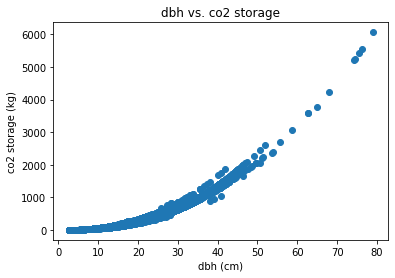

In [16]:
x = co2_estimate['DBH']
y = co2_estimate['co2']

plt.scatter(x, y)
plt.xlabel('dbh (cm)')
plt.ylabel('co2 storage (kg)')
plt.title('dbh vs. co2 storage')

The mean-squared error of the regression model is 2425.88 and the coefficient of determination is 0.98.
The slope of the linear regression line is [[10771.35924712]] and the y-intercept is [-49.461401] .


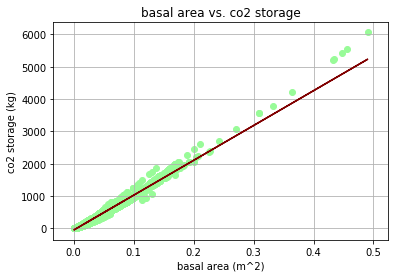

In [17]:
#convert dbh (cm) to basal area (m^2)
#convert dbh (cm) to basal area (m^2)
x = np.pi * ((co2_estimate['DBH'] * 0.01)/2)**2
x_data = pd.DataFrame(x)
y_data = pd.DataFrame(y)

#create linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(x_data,y_data)
co2_predict_reg = lm.predict(x_data)

#find mean_squared error and r^2
mse = metrics.mean_squared_error(y_data, co2_predict_reg)
cod = metrics.r2_score(y_data, co2_predict_reg)
slope = lm.coef_
print("The mean-squared error of the regression model is {:.2f} and the coefficient of determination is {:.2f}.".format(mse, cod))
print("The slope of the linear regression line is", slope,"and the y-intercept is", lm.intercept_, ".")

plt.scatter(x, y, color = 'palegreen')
plt.plot(x, co2_predict_reg, color = 'maroon')
plt.xlabel('basal area (m^2)')
plt.ylabel('co2 storage (kg)')
plt.title('basal area vs. co2 storage')
plt.grid()

In [18]:
co2_sequestered = []
for val in x:
    co2_sequestered.append(float(val*slope))

co2_sequestered_series = pd.Series(co2_sequestered)
co2_estimate["Basal area (m^2)"] = x
co2_estimate["co2_seq (kg)"] = co2_sequestered_series
co2_estimate.head()

,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2,Basal area (m^2),co2_seq (kg)
0,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,446.243692,818.857175,0.083019,894.226971
1,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,126.438506,232.014659,0.030043,323.600568
2,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,638.395143,1171.455087,0.118615,1277.646434
3,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,73.855358,135.524583,0.019478,209.802763
4,1,90,11,20,6,6,2000,5,11700,16,40.386,200,-2.5384,2.4814,764.342654,1402.568770,0.128101,1379.818851


[0.00039205 0.00011557 0.         0.         0.00012067 0.00033606
 0.         0.        ]


C:\Users\EBice\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


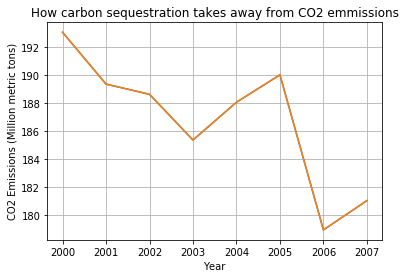

In [19]:
sequestration_list = []

data_2000 = co2_estimate[co2_estimate["Year"]==2000]
sequestration_list.append(sum(data_2000["co2_seq (kg)"]))
data_2001 = co2_estimate[co2_estimate["Year"]==2001]
sequestration_list.append(sum(data_2001["co2_seq (kg)"]))
data_2002 = co2_estimate[co2_estimate["Year"]==2002]
sequestration_list.append(sum(data_2002["co2_seq (kg)"]))
data_2003 = co2_estimate[co2_estimate["Year"]==2003]
sequestration_list.append(sum(data_2003["co2_seq (kg)"]))
data_2004 = co2_estimate[co2_estimate["Year"]==2004]
sequestration_list.append(sum(data_2004["co2_seq (kg)"]))
data_2005 = co2_estimate[co2_estimate["Year"]==2005]
sequestration_list.append(sum(data_2005["co2_seq (kg)"]))
data_2006 = co2_estimate[co2_estimate["Year"]==2006]
sequestration_list.append(sum(data_2006["co2_seq (kg)"]))
data_2007 = co2_estimate[co2_estimate["Year"]==2007]
sequestration_list.append(sum(data_2007["co2_seq (kg)"]))

sequestration = np.array(sequestration_list)
sequestration = sequestration/(1000*1000000)
print(sequestration)

emissions_to_2007 = emissions[emissions["Year"] <= 2007][emissions["Year"] >= 2000]
plt.plot(emissions_to_2007["Year"], emissions_to_2007["Total CO2 Emissions (Million metric tons)"])
plt.plot(emissions_to_2007["Year"], emissions_to_2007["Total CO2 Emissions (Million metric tons)"] - sequestration)
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million metric tons)")
plt.title("How carbon sequestration takes away from CO2 emmissions")
plt.grid()

As can be seen from the cell above the effect of carbon sequestration is almost negilible against human caused carbon dioxide emissions.

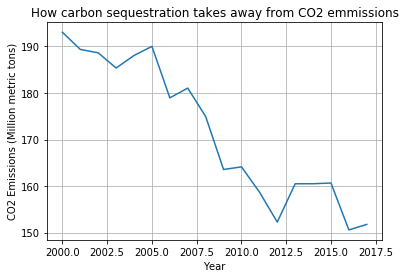

In [38]:
tree_numbers = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
tree_seq = []
for tree_num in tree_numbers:
    trees_dbh = tree_num*np.mean(co2_estimate["DBH"])
    trees_basal = np.pi * ((trees_dbh * 0.01)/2)**2
    trees_seq = trees_basal*slope
    tree_seq.append(trees_seq)

increase = 0

for trees in tree_seq:
    sequestration_list_2 = sequestration_list
    for num in range(10):
        increase += trees_seq
        sequestration_list_2.append(float(increase))
    #print(sequestration_list_2)

    sequestration = np.array(sequestration_list_2)
    sequestration = sequestration/(1000*1000000)
    sequestration_list_2 = sequestration_list
 #--> The problem line   #plt.plot(data_2000["Year"], data_2000["Total CO2 Emissions (Million metric tons)"] - sequestration, label = tree_num)

data_2000 = emissions[emissions["Year"] >= 2000]
plt.plot(data_2000["Year"], data_2000["Total CO2 Emissions (Million metric tons)"])
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million metric tons)")
plt.title("How carbon sequestration takes away from CO2 emmissions")
plt.grid()

## Model

In [21]:
community_evaluation = pd.concat([pop_and_urban_land["Population in 2000"],pop_and_urban_land["Density (people/km2)"],pop_and_urban_land["% Urban Land"],mi_canopy_data_by_community["Total green space (ha)"]], axis = 1)
community_evaluation.head()

,Population in 2000,Density (people/km2),% Urban Land,Total green space (ha)
0,627,248.105093,0.000000,232.9780
1,21574,1167.386317,0.928864,1146.7500
2,157,864.120335,0.000000,10.5417
3,461,186.667543,0.000000,224.3340
4,785,311.907842,0.000000,231.0580


In [22]:
x_train, x_test, y_train, y_test = train_test_split(community_evaluation, community_assessment["Rating"], test_size=0.30)

In [23]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

predict = rfc.predict(x_test)
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

   Excellent       0.33      0.33      0.33         3
        Fair       0.35      0.43      0.38        58
        Good       0.40      0.27      0.32        37
        Poor       0.48      0.49      0.48        81
   Very Good       0.40      0.20      0.27        10

    accuracy                           0.41       189
   macro avg       0.39      0.35      0.36       189
weighted avg       0.42      0.41      0.41       189



C:\Users\EBice\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The mean-squared error of the regression model is 89459.25 and the coefficient of determination is 0.96.
The slope of the linear regression line is [4.13654568] and the y-intercept is [[0.0388314]] .


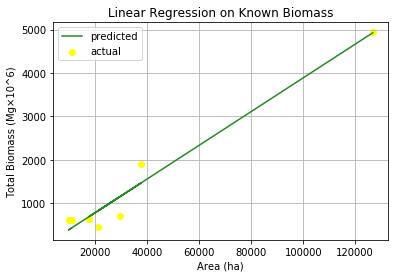

In [24]:
#create shorter labels
known_area = pd.DataFrame(known_biomass["Area (Mha)"]*1000)
known_bio = pd.DataFrame(known_biomass["Total biomass (Mg×10^6)"])

#create linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(known_area, known_bio)
known_biomass_predictions = lm.predict(known_area)

#find mean_squared error and r^2
mse = metrics.mean_squared_error(known_bio["Total biomass (Mg×10^6)"], known_biomass_predictions)
cod = metrics.r2_score(known_bio["Total biomass (Mg×10^6)"], known_biomass_predictions)
print("The mean-squared error of the regression model is {:.2f} and the coefficient of determination is {:.2f}.".format(mse, cod))
print("The slope of the linear regression line is", lm.intercept_,"and the y-intercept is", lm.coef_, ".")

#plot results
plt.scatter(known_area, known_bio, label = "actual", color = "yellow")
plt.plot(known_area, known_biomass_predictions, label = "predicted", color = "forestgreen")
plt.title("Linear Regression on Known Biomass")
plt.xlabel("Area (ha)")
plt.ylabel("Total Biomass (Mg×10^6)")
plt.legend()
plt.grid()

The regression line between the known estimates is used a training set to determine the relationship between vegetation coverage and biomass. 

,Community Name,% Tree Canopy Cover,Tree Canopy Cover m2/person,Total green space (ha),Canopy green space %,Biomass
0,Addison village,0.110675,459.272727,232.9780,0.123601,13.183409
1,Adrian city,0.085301,73.550107,1146.7500,0.138371,48.666459
2,Ahmeek village,0.185460,184.987261,10.5417,0.275506,4.545895
3,Akron village,0.037486,200.889371,224.3340,0.041282,12.847750
4,Alanson village,0.357788,1192.459873,231.0580,0.405128,13.108852


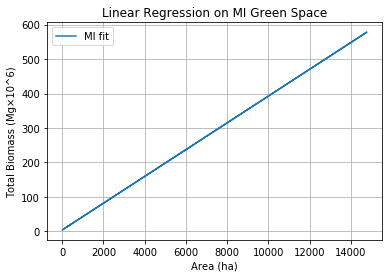

In [25]:
mi_area = pd.DataFrame(mi_canopy_data_by_community["Total green space (ha)"])
mi_biomass_predictions = lm.predict(mi_area)
mi_canopy_data_by_community["Biomass"] = mi_biomass_predictions

plt.plot(mi_area, mi_biomass_predictions, label = "MI fit")
plt.title("Linear Regression on MI Green Space")
plt.xlabel("Area (ha)")
plt.ylabel("Total Biomass (Mg×10^6)")
plt.legend()
plt.grid()

mi_canopy_data_by_community.head()

The regression from the known data set is used on the NFS data to predict above ground biomass (agb)

[42779.41764761]


,Community Name,% Tree Canopy Cover,Tree Canopy Cover m2/person,Total green space (ha),Canopy green space %,Biomass,Carbon Storage
0,Addison village,0.110675,459.272727,232.9780,0.123601,13.183409,24.191555
1,Adrian city,0.085301,73.550107,1146.7500,0.138371,48.666459,89.302952
2,Ahmeek village,0.185460,184.987261,10.5417,0.275506,4.545895,8.341717
3,Akron village,0.037486,200.889371,224.3340,0.041282,12.847750,23.575621
4,Alanson village,0.357788,1192.459873,231.0580,0.405128,13.108852,24.054744


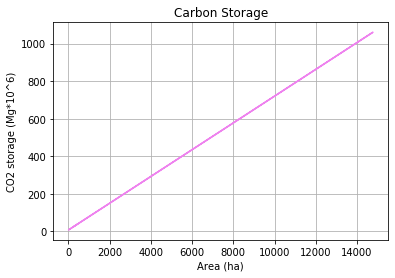

In [26]:
co2_storage = mi_biomass_predictions*0.5*3.67
mi_canopy_data_by_community["Carbon Storage"] = co2_storage

print(sum(co2_storage))

plt.plot(mi_canopy_data_by_community["Total green space (ha)"], co2_storage, label = "co2 storage", color = "violet")
plt.title("Carbon Storage")
plt.xlabel("Area (ha)")
plt.ylabel("CO2 storage (Mg*10^6)")
plt.grid()

mi_canopy_data_by_community.head()

The amount of carbon stored in any given tree is 50% of the agb. In the above graph, the carbon storage is being estimated given the predicted agb. 

In [27]:
community_evaluation_carbon = pd.concat([mi_canopy_data_by_community["Biomass"],mi_canopy_data_by_community["Carbon Storage"]], axis = 1)
community_evaluation_carbon.head()

,Biomass,Carbon Storage
0,13.183409,24.191555
1,48.666459,89.302952
2,4.545895,8.341717
3,12.847750,23.575621
4,13.108852,24.054744


In [28]:
x_train, x_test, y_train, y_test = train_test_split(community_evaluation_carbon, community_assessment["Rating"], test_size=0.30)

In [29]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

predict = rfc.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00         3
        Fair       0.37      0.33      0.35        60
        Good       0.18      0.21      0.20        33
        Poor       0.49      0.51      0.50        85
   Very Good       0.14      0.12      0.13         8

    accuracy                           0.38       189
   macro avg       0.24      0.24      0.24       189
weighted avg       0.38      0.38      0.38       189



C:\Users\EBice\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Results

Using the regression above, we can approximate the carbon stored in urban trees based on the urban tree canopy cover. Both of these measurements of from page 1 of the Michigan data set and have been hardcoded in for ease. 

In [30]:
canopy_cover = 1629.0 #this is the measurement of the statewide urban tree canopy cover in km^2
carbon_storage = 14800000 #this is the estimated carbon storage in the urban trees in metric tons

canopy_cover = canopy_cover / 100 #convert kilometers to ha
#1 megagram = 1 metric ton
carbon_storage = carbon_storage / (10**6) #same units as prediction

carbon_predict = (4.13 * canopy_cover + 0.038) * 0.5

print('Predicted: ', carbon_predict)
print('Actual: ', carbon_storage)

Predicted:  33.657849999999996
Actual:  14.8


## Conclusions

_(Conclusions.)_

### References

Safford, H.; Larry, E.; McPherson, E.G.; Nowak, D.J.; Westphal, L.M. (August 2013). Urban Forests and Climate Change. U.S. Department of Agriculture, Forest Service, Climate Change Resource Center. www.fs.usda.gov/ccrc/topics/urban-forests/